In [1]:
import numpy as np
import torch
from transformers import Kosmos2ForConditionalGeneration, Kosmos2Processor
from PIL import Image, ImageDraw, ImageFont
import requests

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
version = "microsoft/kosmos-2-patch14-224"
url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.jpg"
prompt = "<grounding> An image of"

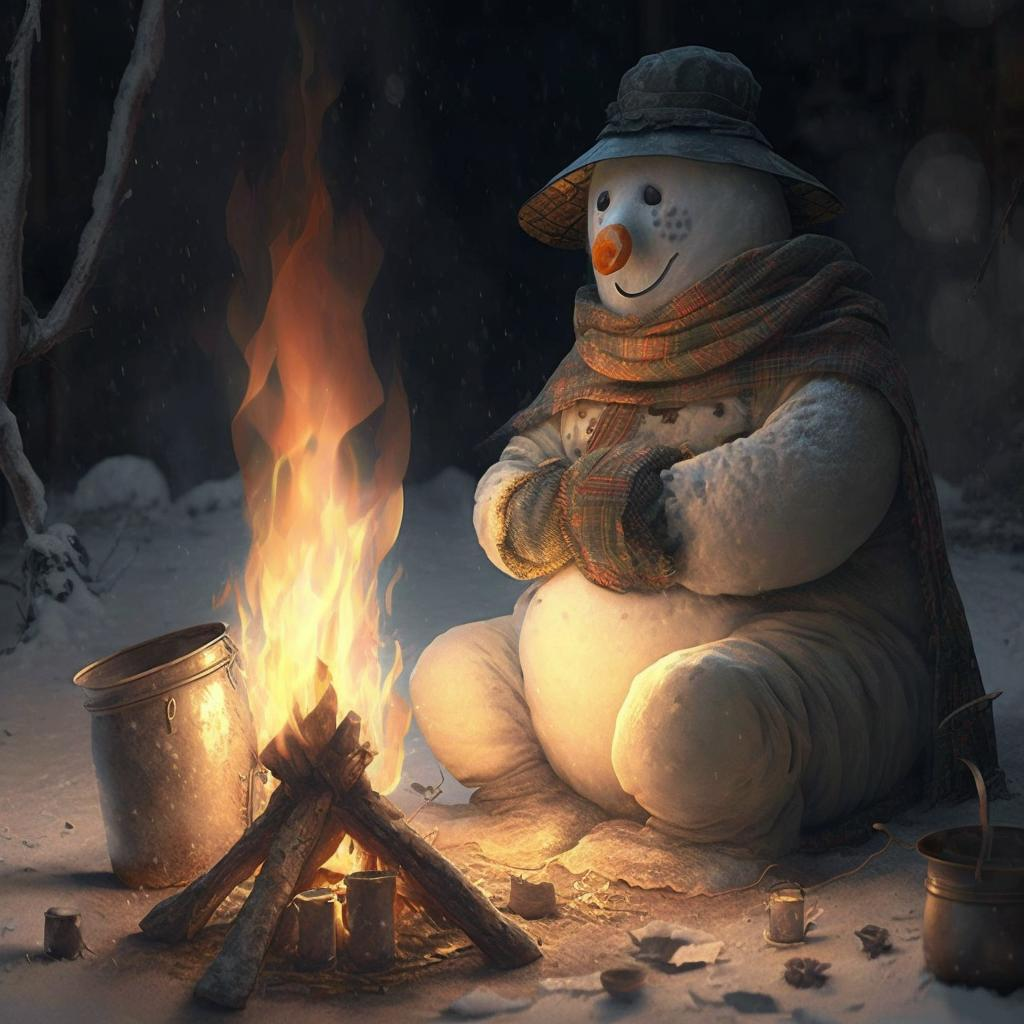

In [4]:
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
image

In [5]:
h, w, c = np.array(image).shape
h, w, c

(1024, 1024, 3)

# Kosmos2Processor

In [6]:
processor: Kosmos2Processor = Kosmos2Processor.from_pretrained(version)
processor

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Kosmos2Processor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "Kosmos2Processor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  },
  "use_square_size": true
}

- tokenizer: XLMRobertaTokenizerFast(name_or_path='microsoft/kosmos-2-patch14-224', vocab_size=64002, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': [

## processor

In [7]:
inputs = processor(
    text = prompt,              # 可以为列表或单个string
    images = image,             # 可以为列表或单张图片
    return_tensors = "pt",      # 返回数据格式 np pt tf jax
).to(device, torch.float16)
inputs

{'pixel_values': tensor([[[[-1.6171, -1.6171, -1.5879,  ..., -1.4857, -1.5295, -1.5441],
          [-1.6171, -1.6171, -1.6025,  ..., -1.5295, -1.5587, -1.5587],
          [-1.6025, -1.6025, -1.5879,  ..., -1.5587, -1.5733, -1.5733],
          ...,
          [-0.5514, -0.5222, -0.5076,  ..., -0.9602, -0.9893, -0.9893],
          [-0.5514, -0.5514, -0.5368,  ..., -0.9456, -0.9748, -0.9893],
          [-0.5368, -0.5660, -0.5368,  ..., -0.9456, -0.9602, -0.9893]],

         [[-1.5270, -1.5270, -1.4970,  ..., -1.4219, -1.4669, -1.4820],
          [-1.5270, -1.5270, -1.5120,  ..., -1.4669, -1.4970, -1.4970],
          [-1.5120, -1.5120, -1.4970,  ..., -1.4970, -1.5120, -1.5120],
          ...,
          [-0.5365, -0.5065, -0.4914,  ..., -0.7916, -0.8216, -0.8216],
          [-0.5365, -0.5365, -0.5215,  ..., -0.7766, -0.8066, -0.8216],
          [-0.5215, -0.5515, -0.5215,  ..., -0.7766, -0.7916, -0.8216]],

         [[-1.1958, -1.1958, -1.1674,  ..., -1.1105, -1.1532, -1.1674],
          [-1

In [8]:
inputs["input_ids"]

tensor([[    0, 64003,     4,     5,     6,     7,     8,     9,    10,    11,
            12,    13,    14,    15,    16,    17,    18,    19,    20,    21,
            22,    23,    24,    25,    26,    27,    28,    29,    30,    31,
            32,    33,    34,    35,    36,    37,    38,    39,    40,    41,
            42,    43,    44,    45,    46,    47,    48,    49,    50,    51,
            52,    53,    54,    55,    56,    57,    58,    59,    60,    61,
            62,    63,    64,    65,    66,    67, 64004, 64012,   712,  1648,
             9]], device='cuda:0')

In [9]:
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

# Kosmos2ForConditionalGeneration

In [10]:
model: Kosmos2ForConditionalGeneration = Kosmos2ForConditionalGeneration.from_pretrained(version, torch_dtype=torch.float16).to(device)

In [11]:
model.eval()
with torch.inference_mode():
    generated_ids = model.generate(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        image_embeds=None,
        image_embeds_position_mask=inputs["image_embeds_position_mask"],
        use_cache=True,
        max_new_tokens=64,
    )
generated_ids

tensor([[    0, 64003,     4,     5,     6,     7,     8,     9,    10,    11,
            12,    13,    14,    15,    16,    17,    18,    19,    20,    21,
            22,    23,    24,    25,    26,    27,    28,    29,    30,    31,
            32,    33,    34,    35,    36,    37,    38,    39,    40,    41,
            42,    43,    44,    45,    46,    47,    48,    49,    50,    51,
            52,    53,    54,    55,    56,    57,    58,    59,    60,    61,
            62,    63,    64,    65,    66,    67, 64004, 64012,   712,  1648,
             9, 64007,    10, 43867, 64008, 64009, 64057, 64876, 64010,  5950,
           597,    32, 64007,    10,   646, 64008, 64009, 64018, 64924, 64010,
             4,     2]], device='cuda:0')

In [12]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

'<image>. the, to and of as in I that\' for is was- on’ it with The as at bet he have from by are " you his “ this said not has an ( but had we her they will my or were their): up about out who one all been she can more would It</image><grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>.'

In [13]:
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
processed_text

'<grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>.'

In [14]:
caption, entities = processor.post_process_generation(generated_text)
caption
# <grounding> An image of<phrase> a snowman</phrase> warming himself by<phrase> a fire</phrase>

'An image of a snowman warming himself by a fire.'

In [15]:
entities
# x1y1x2y2
# <phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object>
# <phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>

[('a snowman', (12, 21), [(0.390625, 0.046875, 0.984375, 0.828125)]),
 ('a fire', (41, 47), [(0.171875, 0.015625, 0.484375, 0.890625)])]

In [31]:
image_draw = image.copy()
draw = ImageDraw.Draw(image_draw)

In [32]:
h, w

(1024, 1024)

In [33]:
font = ImageFont.truetype(font='../simhei.ttf', size=np.floor(3e-2 * w + 0.5).astype('int32'))
font

a snowman :
	 400 48 1008 848
a fire :
	 176 16 496 912


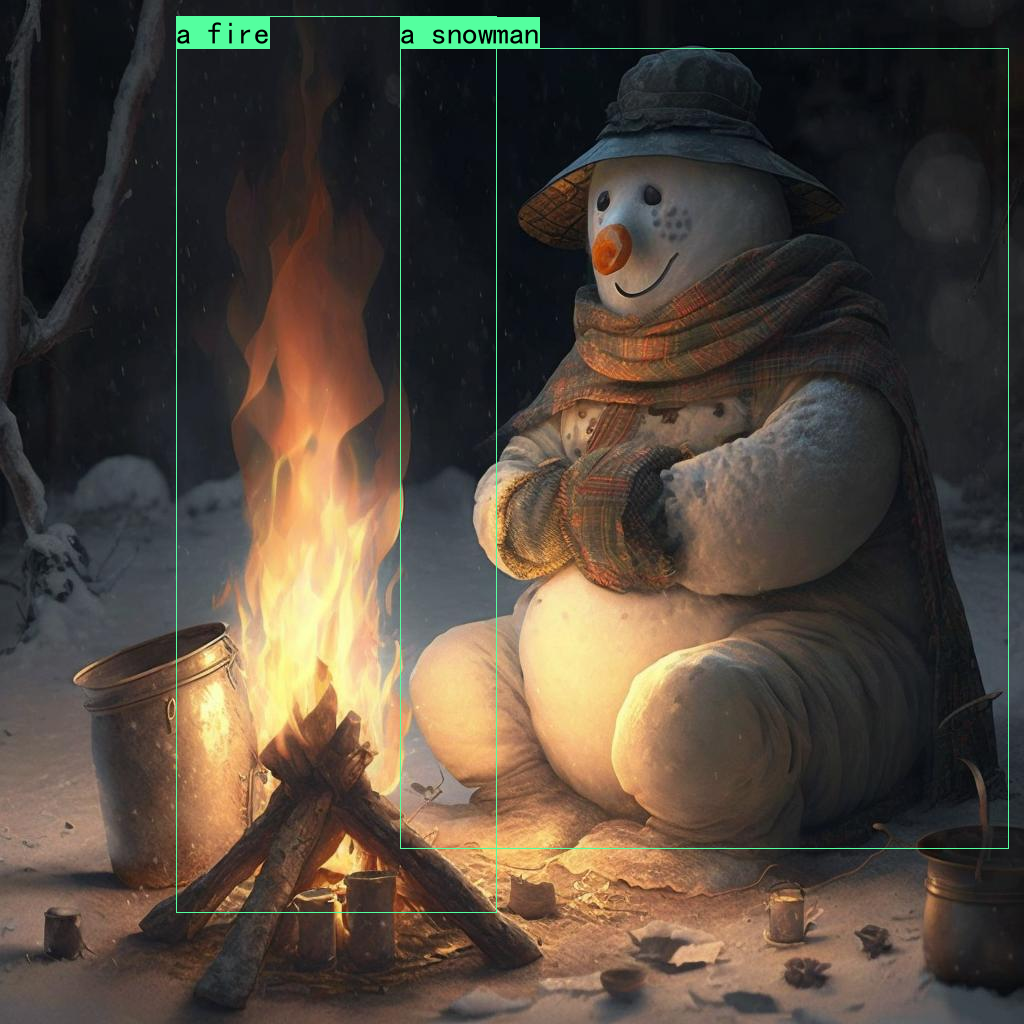

In [34]:
for label, unknow, xyxys in entities:
    print(label, ":")
    # label_size = draw.textsize(label, font)               # [textwidth, textheight]
    label_size = draw.textlength(label, font), font.size    # [textwidth, textheight] Pillow >= 10.0
    label = label.encode('utf-8')

    for xyxy in xyxys:
        xyxy = (xyxy[0] * w, xyxy[1] * h, xyxy[2] * w, xyxy[3] * h)
        xyxy = [int(round(i)) for i in xyxy]

        left, top, right, bottom = xyxy
        print("\t", left, top, right, bottom)

        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])

        draw.rectangle(xyxy, outline=(84, 255, 159), width=1)                                       # draw box
        draw.rectangle([tuple(text_origin), tuple(text_origin + label_size)], fill=(84, 255, 159))  # text background
        draw.text(text_origin, str(label,'UTF-8'), fill=(0, 0, 0), font=font)                       # text
image_draw